In [1]:
import numpy as np
from bokeh.plotting import output_notebook

In [15]:
from bokeh.plotting import figure, show
#from bokeh.plotting import output_file
from bokeh.plotting import output_notebook
import numpy as np
# from bokeh.io import output_file # Outra aba

import getpass
usr = getpass.getuser()
print( usr)
import datetime

felipe


In [16]:
import importlib
import scalar_metrics_v02
importlib.reload(scalar_metrics_v02)
from scalar_metrics_v02 import LoadMetrics

In [17]:
cam, exp, night = 'z0', '00000003', '20190101'

print ("\n\nTests for the available scalars and using yaml output\n", "="*50)
print ("TO DO:\n *docs of functions \n *what more else?")

lm = LoadMetrics(cam, exp, night);



Tests for the available scalars and using yaml output
TO DO:
 *docs of functions 
 *what more else?
countpix loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-countpix-z0-00000003.yaml
getbias loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-getbias-z0-00000003.yaml
getrms loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-getrms-z0-00000003.yaml
xwsigma loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-xwsigma-z0-00000003.yaml
countbins loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-countbins-z0-00000003.yaml
integ loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-integ-z0-00000003.yaml
skycont loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skycont-z0-00000003.yaml
skypeak loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skypeak-z0-00000003.yaml
skyresid loaded
/home/felipe/quick

In [18]:
metrics, tests  = lm.metrics, lm.tests # Load_metrics_n_tests()

In [19]:
countpix  = metrics['countpix']
getbias   = metrics['getbias']
getrms    = metrics['getrms']
xwsigma   = metrics['xwsigma']
countbins = metrics['countbins']
integ     = metrics['integ']
skycont   = metrics['skycont']
skypeak   = metrics['skypeak']
skyresid  = metrics['skyresid']
snr       = metrics['snr']

In [20]:
from bokeh.models import ColumnDataSource
import bokeh.plotting as bk
bk.output_notebook()

Loading BokehJS ...

In [21]:
# Creating my new bokeh colormap palette

def palette(name_of_mpl_palette):
    """ Transforms a matplotlib palettes into a bokeh 
    palettes
    """
    from matplotlib.colors import rgb2hex
    import matplotlib.cm as cm
    colormap =cm.get_cmap(name_of_mpl_palette) #choose any matplotlib colormap here
    bokehpalette = [rgb2hex(m) for m in colormap(np.arange(colormap.N))]
    return bokehpalette

import bokeh.palettes as bp

cmap_all = bp.__palettes__

In [75]:
maps = ["viridis","coolwarm_r","RdYlBu_r", "bwr","BrBG_r", "jet"
       , "cool", "spring", "winter"]
my_palette = palette("viridis")
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
'#999999', '#e41a1c', '#dede00']
my_palette = palette("BrBG_r")
my_palette = palette(maps[8])
my_palette = CB_color_cycle

## XWSIGMA

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from bokeh.models import Range1d
from bokeh.models import ColumnDataSource, HoverTool, TapTool #, OpenURL
from bokeh.models import LinearColorMapper ,    ColorBar
#from bokeh.palettes import (Colorblind3,RdYlBu11, YlGnBu9,Spectral3, 
#                    Plasma256, RdYlBu,Colorblind, Viridis3, Viridis256)


camnum =  [ int(s) for s in cam if s.isdigit()][0]
c1,c2  = camnum*500, (camnum+1)*500
qlf_fiberid = np.arange(0,5000)[c1:c2] # Evaluate inside QLF

z = np.array(xwsigma['WSIGMA'])

#colors = [
#    "#%02x%02x%02x" % (int(r), int(g), int(b)) 
#    for r, g, b, _ in 255*mpl.cm.nipy_spectral(mpl.colors.Normalize()(z))
#]

source = ColumnDataSource(data={
    'x1' : xwsigma['RA'][c1:c2],
    'y1' : xwsigma['DEC'][c1:c2],
    'z'  : z,
    'QLF_FIBERID': qlf_fiberid,
})

source_comp = ColumnDataSource(data = {
    'x_comp': xwsigma['RA'][:c1] + xwsigma['RA'][c2:],
    'y_comp': xwsigma['DEC'][:c1] + xwsigma['DEC'][c2:],   
})

left, right, bottom, top =  331, 335, 13, 16.7
hover = HoverTool(tooltips=[
         ("FIBER ID", "@QLF_FIBERID"),
         ("RA", "$x"),
         ("DEC", "$y"),
         ("WSIGMA", "@z"),
          ("fc","$color[ swatch]:fill_color")
         ])

#hover = HoverTool(names=["data"]) 
p = figure( plot_width=700, plot_height=600
           ,x_range=Range1d(left, right), y_range=Range1d(bottom, top)
          , tools= [hover, "pan,box_zoom,reset"])

mapper = LinearColorMapper(palette= my_palette, low=0.98*np.min(z), high=1.02*np.max(z))#nipy_spectral)#Viridis256)#,RdYlBu11)#Viridis256)#, low=0, high=100)


p.circle('x1','y1', source = source, name="data", radius = 0.015,
        fill_color={'field': 'z', 'transform': mapper}, # line_color=None,
         line_color='black', line_width=0.1)#""")# , source=source)

p.circle('x_comp','y_comp', source = source_comp, radius = 0.015, fill_color = 'lightgray'
          , line_color='black', line_width=0.3)#""")# , source=source)

# bokeh.pydata.org/en/latest/docs/reference/models/annotations.html
color_bar = ColorBar(color_mapper=mapper, label_standoff=-14,
                    major_label_text_font_style="bold", padding = 25,
                      major_label_text_align ='right',
                     major_label_text_font_size="10pt",
                     location=(0, 0))

p.add_layout(color_bar, 'left')

""",# radius=radii/radii,
fill_color=colors, fill_alpha=1.,
line_color=None)"""


show(p)  

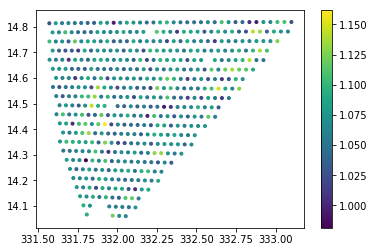

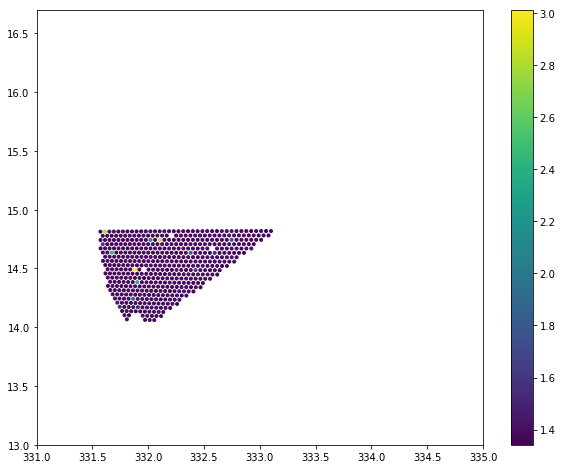

In [17]:
plt.scatter(xwsigma['RA'][c1:c2], xwsigma['DEC'][c1:c2], marker='.', c= xwsigma['XSIGMA'])#, c= mym['XSIGMA'])#, mym['WSIGMA'], edgecolor = 'k')
plt.colorbar()
plt.show()
plt.figure(figsize=(10,8))
plt.xlim(331,335)
plt.ylim(13,16.7)
plt.scatter(xwsigma['RA'][c1:c2], xwsigma['DEC'][c1:c2], marker='.', c= xwsigma['WSIGMA'])
plt.colorbar()



In [15]:
qlf_fiberid = np.arange(0,5000)[c1:c2]
print (qlf_fiberid[0:10])

[1500 1501 1502 1503 1504 1505 1506 1507 1508 1509]


​

## AUXILIAR

In [30]:
import numpy as np

from bokeh.io import show
from bokeh.layouts import gridplot
from bokeh.models import (
    ColumnDataSource,
    ColorBar,
    LinearColorMapper,
    LogColorMapper,
)

from bokeh.palettes import Viridis3, Viridis256
from bokeh.plotting import figure

x = np.random.random(2500) * 140 - 20
y = np.random.normal(size=2500) * 2 + 5

source = ColumnDataSource(dict(x=x, y=y))
opts = dict(x='x', line_color=None, source=source)


cmap_list = [Category10_10,Accent8,BuPu5,
                    Colorblind3,RdYlBu11, YlGnBu9,Spectral3, 
                    Plasma256, RdYlBu,Colorblind, Viridis3, Viridis256]

def make_plot(mapper, title):
    mapper.low_color = 'blue' # cor abaixo de low no range do LinearColorMapper
    mapper.high_color = 'red' # 
    p = figure(toolbar_location=None, tools='', title=title)
    color_bar = ColorBar(color_mapper=mapper, location=(0, 0))
    p.circle(
        x='x', y='y',
        fill_color={'field': 'x', 'transform': mapper}, line_color=None,
        source=source
    )

    p.add_layout(color_bar, 'right')
    return p

p1 = make_plot(LinearColorMapper(palette=Viridis256, low=0, high=100), title='Viridis256 - Linear, low/high = blue/red')
p2 = make_plot(LogColorMapper(palette=Viridis256, low=0, high=100), title='Viridis256 - Log, low/high = blue/red')
p3 = make_plot(LinearColorMapper(palette=Viridis3, low=0, high=100), title='Viridis3 - Linear, low/high = blue/red')
p4 = make_plot(LogColorMapper(palette=Viridis3, low=0, high=100), title='Viridis3 - Log, low/high =, blue/red')

show(gridplot([p1, p2, p3, p4], ncols=2, plot_width=400, plot_height=300, toolbar_location=None))

In [20]:
print( len(cmap_all))

for i in range(1,187):

    if 187%i == 0:

        print (i)

374
1
11
17


In [23]:
p=[]
for i in range(10):
    p0 = make_plot(LinearColorMapper(palette=cmap_all[i], low=-20, high=120), title='%d'%(i))
    p.append(p0)
    
show(gridplot(p, ncols=2, plot_width=400, plot_height=300, toolbar_location=None))


In [21]:
p =[]

cmap_list = [Category10_10, Accent8, BuPu5, Colorblind3
             ,RdYlBu11, YlGnBu9,Spectral3, Plasma256
             , RdYlBu11, Colorblind3, Viridis3, Viridis256]

j = 8

for i in range(j,j+4):
    p0 = make_plot(LinearColorMapper(palette=cmap_list[i], low=-20, high=120), title='%d'%(i))
    p.append(p0)

show(gridplot([p[0], p[1], p[2], p[3]], ncols=2, plot_width=400, plot_height=300, toolbar_location=None))

AttributeError: 'Figure' object has no attribute 'append'

In [30]:
from  astropy.io  import fits
import matplotlib.pyplot as plt
imf = '/home/felipe/quicklook/spectro/redux/exposures/20190101/00000004/sframe-r0-00000004.fits'
image_data = fits.getdata(imf, ext=0)
#print(fits.info(imf), '\n\n=====\n',fits.Header(imf))

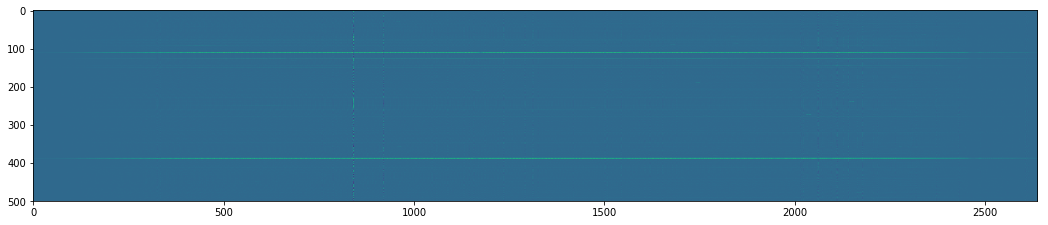

In [31]:
plt.figure(figsize =(18,4))
plt.imshow(image_data)
plt.show();plt.close()

In [41]:
'''desi-00000003.fits.fz  fibermap-00000003.fits
desi-00000004.fits.fz  fibermap-00000004.fits
'''

imfolder = '/home/felipe/quicklook/spectro/data/20190101/'
imf  = imfolder+ 'fibermap-00000004.fits'
image_data = fits.getdata(imf, ext=0)

fits.info(imf)
#plt.figure(figsize =(10,10))
#plt.imshow(image_data)
#plt.show()
#plt.close()

Filename: /home/felipe/quicklook/spectro/data/20190101/fibermap-00000004.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  FIBERMAP      1 BinTableHDU     96   5000R x 26C   [10A, 20A, 8A, K, K, K, K, 5E, 50A, J, K, J, J, J, J, E, D, D, D, D, D, D, D, D, E, E]   
